In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_parquet("data/train.parquet")
df_test = pd.read_parquet("data/test.parquet")

# Merge both datasets in order
df_all = pd.concat([df_train, df_test])

df_new = pd.read_csv('data/comptage-velo-donnees-compteurs.csv', sep=';')

In [3]:
df_new.isna().sum()

Identifiant du compteur                       18194
Nom du compteur                                   0
Identifiant du site de comptage               18194
Nom du site de comptage                       18194
Comptage horaire                                  0
Date et heure de comptage                         0
Date d'installation du site de comptage       18194
Lien vers photo du site de comptage           27595
Coordonnées géographiques                     18194
Identifiant technique compteur                33801
ID Photos                                     27595
test_lien_vers_photos_du_site_de_comptage_    27595
id_photo_1                                    27595
url_sites                                     18194
type_dimage                                   27595
mois_annee_comptage                               0
dtype: int64

In [4]:
df_new.dropna(inplace=True)

In [5]:
df_new = df_new.drop(columns=['Lien vers photo du site de comptage', 'ID Photos', 
                              'test_lien_vers_photos_du_site_de_comptage_', 'id_photo_1',
                              'url_sites', 'type_dimage', 'Coordonnées géographiques',
                              'Date d\'installation du site de comptage'])

In [6]:
df_new.nunique()

Identifiant du compteur             101
Nom du compteur                     101
Identifiant du site de comptage      70
Nom du site de comptage              66
Comptage horaire                   1198
Date et heure de comptage          9621
Identifiant technique compteur       70
mois_annee_comptage                  16
dtype: int64

In [7]:
# check for only relevant counter
# filter by relevant date
# create plot and subtract average

# log bike count is ln(1+x)

In [8]:
df_new.rename(columns={'Nom du compteur': 'counter_name', 'Identifiant du compteur': 'counter_id',
                   'Nom du site de comptage': 'site_name',
                  'Identifiant du site de comptage': 'site_id',
                  'Comptage horaire': 'bike_count',
                  'Date et heure de comptage': 'date',
                  'Identifiant technique compteur': 'counter_technical_id'}, inplace=True)

In [9]:
df_new.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_technical_id,mois_annee_comptage
0,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,3,2022-11-01T06:00:00+01:00,X2H20012081,2022-11
1,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,2,2022-11-01T04:00:00+01:00,X2H20012081,2022-11
2,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,5,2022-11-01T05:00:00+01:00,X2H20012081,2022-11
3,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,8,2022-11-01T07:00:00+01:00,X2H20012081,2022-11
4,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096.0,97 avenue Denfert Rochereau,60,2022-11-01T09:00:00+01:00,X2H20012081,2022-11


In [10]:
# Assuming df_new is your DataFrame and 'date' is your column name
# Convert the 'date' column to datetime, coercing errors
df_new['date'] = pd.to_datetime(df_new['date'], errors='coerce')

# Drop rows where the date could not be converted
df_new.dropna(subset=['date'], inplace=True)

# Now format the datetime objects to strings in the 'yyyy-mm-dd hh:mm:ss' format
# Only apply formatting to non-null datetime values
df_new['date'] = df_new['date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S') if pd.notnull(x) else x)


In [11]:
df_new.isna().sum()

counter_id              0
counter_name            0
site_id                 0
site_name               0
bike_count              0
date                    0
counter_technical_id    0
mois_annee_comptage     0
dtype: int64

In [12]:
df_all_site_names_sorted = df_new.groupby('site_name')['counter_name'].nunique()
print(df_all_site_names_sorted.to_frame())
print(f"Total unique counter names: {df_all_site_names_sorted.sum()}")

                                  counter_name
site_name                                     
10 avenue de la Grande Armée                 1
10 boulevard Auguste Blanqui                 1
102 boulevard de Magenta                     1
106 avenue Denfert Rochereau                 1
129 rue Lecourbe                             1
...                                        ...
Totem 64 Rue de Rivoli                       2
Totem 73 boulevard de Sébastopol             2
Totem 85 quai d'Austerlitz                   2
Totem Cours la Reine                         2
Voie Georges Pompidou                        2

[66 rows x 1 columns]
Total unique counter names: 101


In [13]:
# Updated list of site names to keep
counters_to_keep = [
    "152 boulevard du Montparnasse E-O", "152 boulevard du Montparnasse O-E",
    "18 quai de l'Hôtel de Ville NO-SE", "18 quai de l'Hôtel de Ville SE-NO",
    "20 Avenue de Clichy NO-SE", "20 Avenue de Clichy SE-NO",
    "254 rue de Vaugirard NE-SO", "254 rue de Vaugirard SO-NE",
    "27 quai de la Tournelle NO-SE", "27 quai de la Tournelle SE-NO",
    "28 boulevard Diderot E-O", "28 boulevard Diderot O-E",
    "36 quai de Grenelle NE-SO", "36 quai de Grenelle SO-NE",
    "38 rue Turbigo NE-SO", "38 rue Turbigo SO-NE",
    "39 quai François Mauriac NO-SE", "39 quai François Mauriac SE-NO",
    "6 rue Julia Bartet NE-SO", "6 rue Julia Bartet SO-NE",
    "67 boulevard Voltaire SE-NO", "90 Rue De Sèvres NE-SO", 
    "90 Rue De Sèvres SO-NE", "Face 104 rue d'Aubervilliers N-S",
    "Face 104 rue d'Aubervilliers S-N", "Face au 25 quai de l'Oise NE-SO",
    "Face au 25 quai de l'Oise SO-NE", "Face au 4 avenue de la porte de Bagnolet E-O",
    "Face au 4 avenue de la porte de Bagnolet O-E", "Face au 40 quai D'Issy NE-SO",
    "Face au 40 quai D'Issy SO-NE", "Face au 48 quai de la marne NE-SO",
    "Face au 48 quai de la marne SO-NE", "Face au 70 quai de Bercy N-S",
    "Face au 70 quai de Bercy S-N", "Face au 8 avenue de la porte de Charenton NO-SE",
    "Face au 8 avenue de la porte de Charenton SE-NO", "Pont Charles De Gaulle NE-SO",
    "Pont Charles De Gaulle SO-NE", "Pont de Bercy NE-SO",
    "Pont de Bercy SO-NE", "Pont de la Concorde S-N",
    "Pont des Invalides N-S", "Pont des Invalides S-N",
    "Quai d'Orsay E-O", "Quai d'Orsay O-E", 
    "Totem 64 Rue de Rivoli E-O", "Totem 64 Rue de Rivoli O-E",
    "Totem 73 boulevard de Sébastopol N-S", "Totem 73 boulevard de Sébastopol S-N",
    "Totem 85 quai d'Austerlitz NO-SE", "Totem 85 quai d'Austerlitz SE-NO",
    "Totem Cours la Reine E-O", "Totem Cours la Reine O-E",
    "Voie Georges Pompidou NE-SO", "Voie Georges Pompidou SO-NE"
]

# Assuming df_new is your second DataFrame
# Filter the DataFrame to only include rows with 'site_name' in the sites_to_keep list
df_new = df_new[df_new['counter_name'].isin(counters_to_keep)]



In [14]:
df_new.nunique()

counter_id                50
counter_name              50
site_id                   27
site_name                 26
bike_count              1167
date                    9620
counter_technical_id      27
mois_annee_comptage       15
dtype: int64

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473608 entries, 28407 to 777353
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   counter_id            473608 non-null  object 
 1   counter_name          473608 non-null  object 
 2   site_id               473608 non-null  float64
 3   site_name             473608 non-null  object 
 4   bike_count            473608 non-null  int64  
 5   date                  473608 non-null  object 
 6   counter_technical_id  473608 non-null  object 
 7   mois_annee_comptage   473608 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 32.5+ MB


We have 50 of the 56 counter id's from the original dataset. Let's only use these for our analysis

In [27]:
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X.loc[:, "year"] = X["date"].dt.year
    X.loc[:, "month"] = X["date"].dt.month
    X.loc[:, "day"] = X["date"].dt.day
    X.loc[:, "weekday"] = X["date"].dt.weekday
    X.loc[:, "hour"] = X["date"].dt.hour

    # Finally we can drop the original columns from the dataframe
    return X

def _encode_dates_2022(X):
    # Ensure to work on a copy of the DataFrame to avoid modifying the original
    X = X.copy()

    # Convert the 'date' column to datetime if it's not already
    X['date'] = pd.to_datetime(X['date'])

    # Extract year, month, day, and hour
    X['year'] = X['date'].dt.year
    X['month'] = X['date'].dt.month
    X['day'] = X['date'].dt.day
    X.loc[:, "weekday"] = X["date"].dt.weekday
    X['hour'] = X['date'].dt.hour
    
    not_april_2022 = ~((X['date'].dt.year == 2022) & (X['date'].dt.month == 4))

    X = X[not_april_2022]

    return X

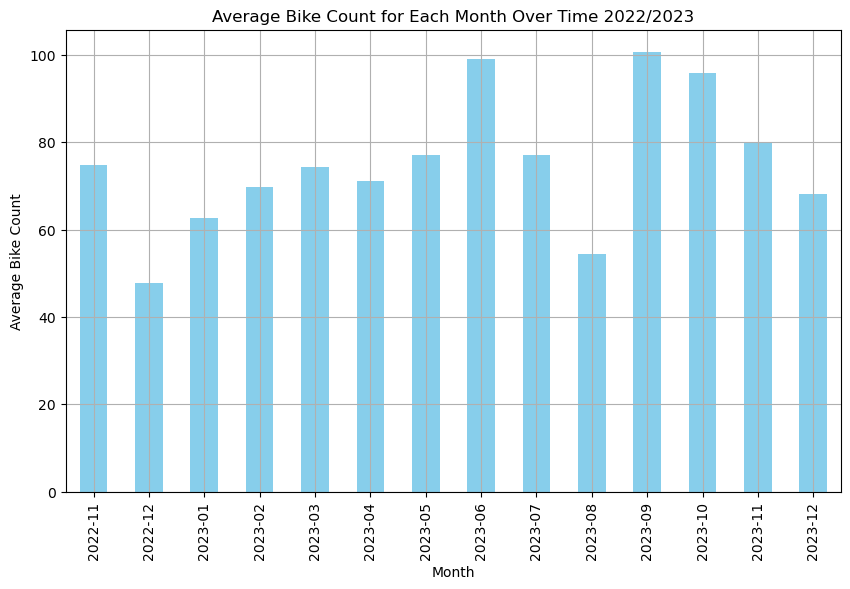

mois_annee_comptage
2022-11     74.815279
2022-12     47.870376
2023-01     62.541129
2023-02     69.777679
2023-03     74.398681
2023-04     71.039972
2023-05     77.060054
2023-06     99.033861
2023-07     77.123306
2023-08     54.420000
2023-09    100.738667
2023-10     95.873264
2023-11     79.992047
2023-12     68.210149
Name: bike_count, dtype: float64


In [28]:
average_monthly_counts_2022 = df_new.groupby('mois_annee_comptage')['bike_count'].mean()

df_new = _encode_dates_2022(df_new)

# Plotting
plt.figure(figsize=(10, 6))
average_monthly_counts_2022.plot(kind='bar', color='skyblue')
plt.title('Average Bike Count for Each Month Over Time 2022/2023')
plt.xlabel('Month')
plt.ylabel('Average Bike Count')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print(average_monthly_counts_2022)

From november to may there were some kind of covid restrictions in Paris

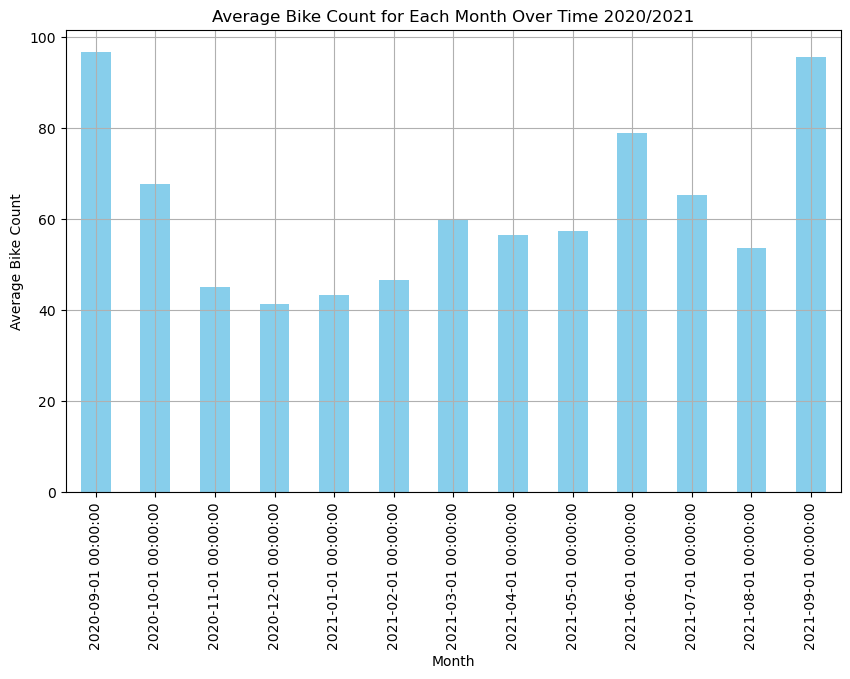

year_month
2020-09-01    96.754849
2020-10-01    67.836075
2020-11-01    45.040406
2020-12-01    41.450187
2021-01-01    43.272012
2021-02-01    46.532878
2021-03-01    59.943907
2021-04-01    56.625967
2021-05-01    57.442828
2021-06-01    78.865799
2021-07-01    65.425499
2021-08-01    53.568689
2021-09-01    95.769180
Name: bike_count, dtype: float64


In [29]:
# Calculate the mean bike count for each day of the week




# Create a 'year-month' column for chronological sorting
df_fe['year_month'] = pd.to_datetime(df_fe['year'].astype(str) + '-' + df_fe['month'].astype(str))

# Calculate the mean bike count for each 'year-month'
average_monthly_counts_2020 = df_fe.groupby('year_month')['bike_count'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_monthly_counts_2020.plot(kind='bar', color='skyblue')
plt.title('Average Bike Count for Each Month Over Time 2020/2021')
plt.xlabel('Month')
plt.ylabel('Average Bike Count')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print(average_monthly_counts_2020)

<Figure size 1800x1200 with 0 Axes>

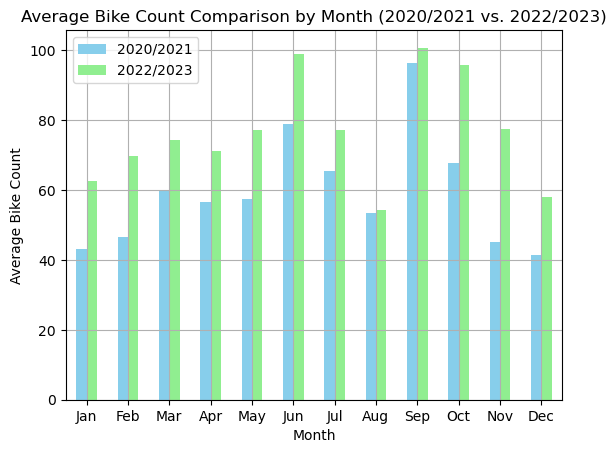

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually entered data
data_2020_2021 = {
    '2020-09-01': 96.754849,
    '2020-10-01': 67.836075,
    '2020-11-01': 45.040406,
    '2020-12-01': 41.450187,
    '2021-01-01': 43.272012,
    '2021-02-01': 46.532878,
    '2021-03-01': 59.943907,
    '2021-04-01': 56.625967,
    '2021-05-01': 57.442828,
    '2021-06-01': 78.865799,
    '2021-07-01': 65.425499,
    '2021-08-01': 53.568689,
    '2021-09-01': 95.769180
}

data_2022_2023 = {
    '2022-11-01': 74.815279,
    '2022-12-01': 47.870376,
    '2023-01-01': 62.541129,
    '2023-02-01': 69.777679,
    '2023-03-01': 74.398681,
    '2023-04-01': 71.039972,
    '2023-05-01': 77.060054,
    '2023-06-01': 99.033861,
    '2023-07-01': 77.123306,
    '2023-08-01': 54.420000,
    '2023-09-01': 100.738667,
    '2023-10-01': 95.873264,
    '2023-11-01': 79.992047,
    '2023-12-01': 68.210149
}

# Convert to DataFrame
df_2020_2021 = pd.DataFrame(list(data_2020_2021.items()), columns=['Date', 'Bike Count'])
df_2022_2023 = pd.DataFrame(list(data_2022_2023.items()), columns=['Date', 'Bike Count'])

# Convert 'Date' to datetime and extract month
df_2020_2021['Date'] = pd.to_datetime(df_2020_2021['Date'])
df_2022_2023['Date'] = pd.to_datetime(df_2022_2023['Date'])
df_2020_2021['Month'] = df_2020_2021['Date'].dt.month
df_2022_2023['Month'] = df_2022_2023['Date'].dt.month

# Group by month and average
avg_2020_2021 = df_2020_2021.groupby('Month')['Bike Count'].mean()
avg_2022_2023 = df_2022_2023.groupby('Month')['Bike Count'].mean()

# Combine data for plotting
combined_data = pd.DataFrame({'2020/2021': avg_2020_2021, '2022/2023': avg_2022_2023})

# Plot
plt.figure(figsize=(18, 12))
combined_data.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Bike Count Comparison by Month (2020/2021 vs. 2022/2023)')
plt.xlabel('Month')
plt.ylabel('Average Bike Count')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid()
plt.legend()
plt.show()
combined_data['ratio'] = combined_data['2022/2023']/ combined_data['2020/2021']



In [31]:
covid_restriction_months = [10, 11, 12, 1, 2, 3, 4, 5, 6]

# Add a COVID restriction column to the DataFrame
combined_data['COVID Restrictions'] = combined_data.index.isin(covid_restriction_months)
combined_data

,2020/2021,2022/2023,ratio,COVID Restrictions
Month,,,,
1,43.272012,62.541129,1.445302,True
2,46.532878,69.777679,1.499535,True
3,59.943907,74.398681,1.241138,True
4,56.625967,71.039972,1.254548,True
5,57.442828,77.060054,1.341509,True
6,78.865799,99.033861,1.255726,True
7,65.425499,77.123306,1.178796,False
8,53.568689,54.420000,1.015892,False
9,96.262014,100.738667,1.046505,False


In [32]:
no_covid_months = combined_data[~combined_data['COVID Restrictions']]
baseline_ratio = no_covid_months['2022/2023'].mean() / no_covid_months['2020/2021'].mean()

# Calculating the COVID impact multiplier for months with COVID restrictions
covid_months = combined_data[combined_data['COVID Restrictions']]
covid_impact_multiplier = covid_months['2022/2023'].mean() / covid_months['2020/2021'].mean()

baseline_ratio, covid_impact_multiplier

(1.0790953770542338, 1.3785808820018268)

We have two multipliers:
- Baseline of 8%: which suggests a general 8% increase in bike usage from 2020/2021 to 2022/2023 which could be due to more bike incentive measures in Paris or population growth or tendancy of people to want to use greener means of Paris
- COVID months 38%: 38% increase represents the increase for a given month when COVID restrictions are lifted.

We can do: 1.379/1.079 = 1.278 so about 27.8% which is the COVID impact on our 2020/2021 data. 

In [33]:
df_new = _encode_dates_2022(df_new)
df_fe = _encode_dates(df_all)

7


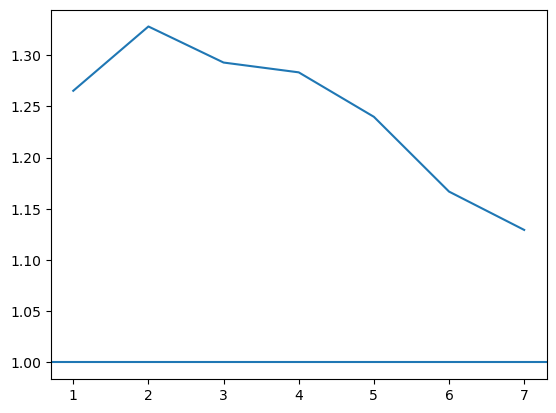

In [67]:
def average_bike_count_per_week(X):
    X = X.copy()
    # Ensure 'date' is a datetime object

    # Extract the week of the year
    X['week_of_year'] = X['date'].dt.isocalendar().day

    # Combine weeks 52 and 53
    #X['week_of_year'] = X['week_of_year'].apply(lambda x: 52 if x >= 52 else x)


    # Calculate the average bike count per week
    weekly_average = X.groupby('week_of_year')['bike_count'].mean()

    return weekly_average

# Example usage:
# weekly_avg_bike_count = average_bike_count_per_week_combined(df)



daily_avg_bike_count_2020 = average_bike_count_per_week(df_fe)
daily_avg_bike_count_2022 = average_bike_count_per_week(df_new)

ratio = daily_avg_bike_count_2022/daily_avg_bike_count_2020

print(len(ratio))

plt.plot(ratio)
plt.axhline(y=1)

In [81]:
def average_bike_count_per_day_of_year(X):
    X = X.copy()
    # Ensure 'date' is a datetime object
    X['date'] = pd.to_datetime(X['date'])

    X = X[~((X['date'].dt.month == 2) & (X['date'].dt.day == 29))]
    # Get the day of the year
    X['day_of_year'] = X['date'].dt.dayofyear

    
    
    # Group by day of the year and calculate the mean
    daily_average = X.groupby('day_of_year')['bike_count'].mean()

    return daily_average

# Example usage:
# daily_avg_bike_count = average_bike_count_per_day_of_year(df)

In [82]:
daily_avg_bike_count_2020 = average_bike_count_per_day_of_year(df_fe)

365


In [83]:
daily_avg_bike_count_2022 = average_bike_count_per_day_of_year(df_new)

In [84]:
ratio = daily_avg_bike_count_2022 / daily_avg_bike_count_2020

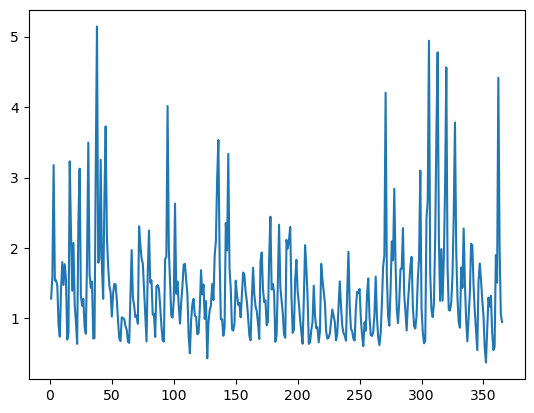

In [85]:
plt.plot(ratio)
plt.axhline(y=1)

In [86]:
couvre_feu_dates = ['2020-10-15', '2020-10-29', '2020-12-16', '2021-04-03', '2021-05-04', '2021-06-20']
confinement_dates = ['2020-10-30', '2020-12-15', '2021-04-04', '2021-05-03']

# Convert to datetime and find the day of the year
couvre_feu_days = pd.to_datetime(couvre_feu_dates).dayofyear
confinement_days = pd.to_datetime(confinement_dates).dayofyear

couvre_feu_days, confinement_days 

(Index([289, 303, 351, 93, 124, 171], dtype='int32'),
 Index([304, 350, 94, 123], dtype='int32'))

In [96]:
curfew_ratio = (np.mean(ratio[289:303]) + np.mean(ratio[351:365]) + np.mean(ratio[1:93]) + np.mean(ratio[124:171]))/4
lockdown_ratio = (np.mean(ratio[304:350]) + np.mean(ratio[94:123]))/2
baseline_ratio = np.mean(ratio[172:289])

print(baseline_ratio)

print(curfew_ratio/baseline_ratio)

print(lockdown_ratio/baseline_ratio)


1.2412894771165521
1.1626808821756407
1.2317360773326127
